In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

#I used the Frankfurt 2011 Airbnb file

# let's make this notebook reproducible
np.random.seed(42)
random.seed(42)

In [41]:
frankfurt = pd.read_csv('D:\Data Science e-books\Lux Data Stuff/Air_bnb_dataset.csv')

<IPython.core.display.Javascript object>

In [42]:
frankfurt.head(5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,14816898,1360,92278018,Shared room,NaN,Frankfurt,NaN,Bahnhofsviertel,51,4.5,10,1.0,NaN,80.0,NaN,2017-06-22 15:39:57.993776,50.108833,8.668395,0101000020E6100000AE9E93DE37562140DFDC5F3DEE0D...
1,15294143,1360,62507234,Shared room,NaN,Frankfurt,NaN,Westend-Süd,27,4.5,2,1.0,NaN,52.0,NaN,2017-06-22 15:39:56.482515,50.120212,8.657187,0101000020E610000074B680D07A5021401B4B581B630F...
2,6751387,1360,17826701,Shared room,NaN,Frankfurt,NaN,Rödelheim,0,0.0,2,1.0,NaN,35.0,NaN,2017-06-22 15:39:54.515975,50.128278,8.596030,0101000020E6100000A9DE1AD82A312140ED65DB696B10...
3,15637480,1360,85072001,Shared room,NaN,Frankfurt,NaN,Oberrad,0,0.0,6,1.0,NaN,346.0,NaN,2017-06-22 15:39:52.319758,50.099801,8.722627,0101000020E6100000C669882AFC712140D68D7747C60C...
4,18244045,1360,68408403,Shared room,NaN,Frankfurt,NaN,Innenstadt,0,0.0,2,1.0,NaN,149.0,NaN,2017-06-22 15:39:47.234792,50.115677,8.694514,0101000020E6100000713AC956976321401FF30181CE0E...


In [43]:
frankfurt.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.995000e+03,1995.0,1.995000e+03,0.0,0.0,1995.000000,1995.000000,1995.000000,1995.000000,0.0,1995.000000,0.0,1995.000000,1995.000000
mean,1.167641e+07,1360.0,4.092822e+07,NaN,NaN,11.171429,2.544110,2.263659,1.099248,NaN,77.532832,NaN,50.117200,8.666842
std,5.467073e+06,0.0,3.603036e+07,NaN,NaN,25.459738,2.368573,1.315237,0.542270,NaN,59.226681,NaN,0.018407,0.035737
min,6.626700e+04,1360.0,1.659300e+04,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,10.000000,NaN,50.024792,8.489325
25%,7.665019e+06,1360.0,1.032169e+07,NaN,NaN,1.000000,0.000000,2.000000,1.000000,NaN,41.000000,NaN,50.105532,8.645188
50%,1.255222e+07,1360.0,2.991108e+07,NaN,NaN,3.000000,4.000000,2.000000,1.000000,NaN,58.000000,NaN,50.116671,8.670427
75%,1.658699e+07,1360.0,6.171958e+07,NaN,NaN,10.000000,5.000000,2.000000,1.000000,NaN,92.000000,NaN,50.124712,8.691819
max,1.942335e+07,1360.0,1.360651e+08,NaN,NaN,465.000000,5.000000,12.000000,8.000000,NaN,864.000000,NaN,50.206080,8.772625


In [44]:
#drop all the fields that have no data
#Nan(Not a number)
frankfurt = frankfurt.drop(['country','last_modified','location','borough','bathrooms','minstay'],axis=1)


In [48]:
frankfurt.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395
1,Shared room,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187
2,Shared room,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030
3,Shared room,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627
4,Shared room,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514


In [51]:
frankfurt = frankfurt.drop(['room_id', 'survey_id','host_id', 'city'], axis=1)
frankfurt.head()

KeyError: "['room_id', 'survey_id', 'host_id', 'city'] not found in axis"

In [46]:
frankfurt.head()

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,14816898,1360,92278018,Shared room,Frankfurt,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395
1,15294143,1360,62507234,Shared room,Frankfurt,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187
2,6751387,1360,17826701,Shared room,Frankfurt,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030
3,15637480,1360,85072001,Shared room,Frankfurt,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627
4,18244045,1360,68408403,Shared room,Frankfurt,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514


In [52]:
#Checking null values
frankfurt.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
latitude                0
longitude               0
dtype: int64

C:\Users\jorda\AppData\Local\Temp\ipykernel_11464\2590922590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(frankfurt['price'],rug=True)


<Axes: xlabel='price', ylabel='Density'>

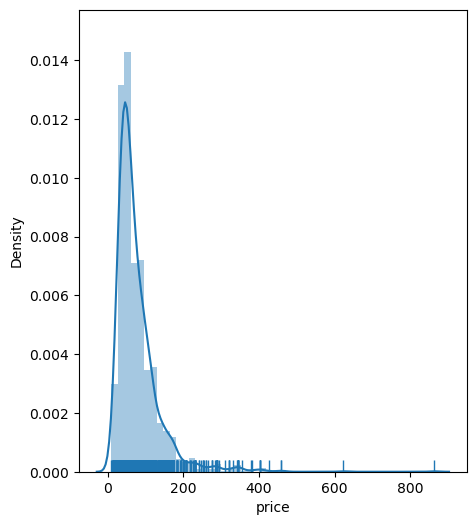

In [27]:
# Exploratory Data Analysis
#This is a Distribution plot
plt.figure(figsize=(5,6))
sb.distplot(frankfurt['price'],rug=True)

In [28]:
frankfurt['room_type'].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

<Axes: title={'center': 'price'}, xlabel='room_type'>

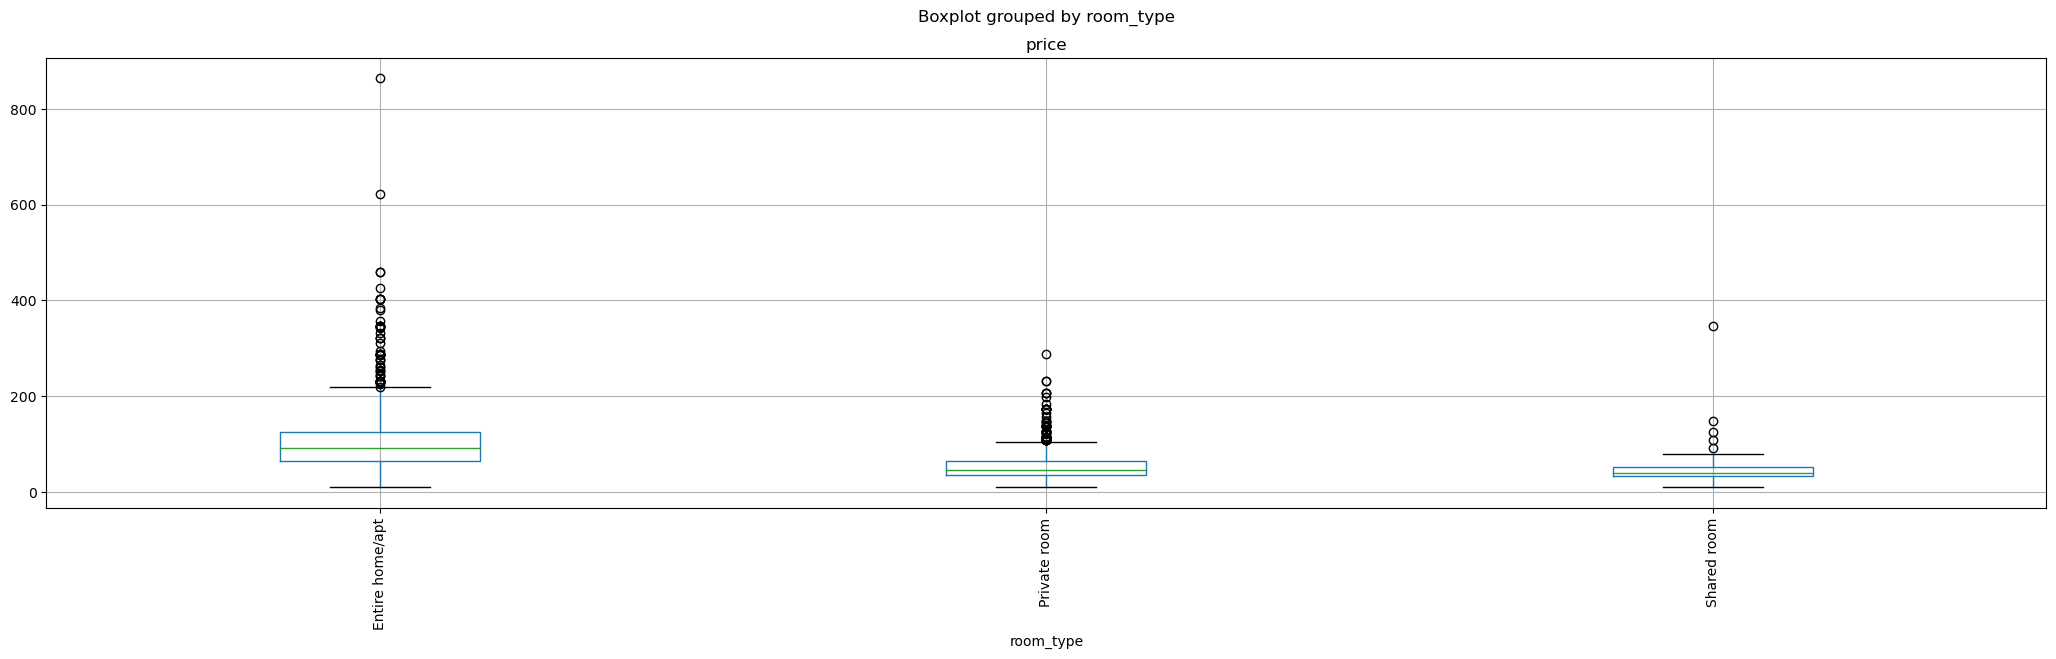

In [29]:
frankfurt.boxplot(column='price',by='room_type',figsize=(25,6),rot=90)

<Axes: title={'center': 'price'}, xlabel='neighborhood'>

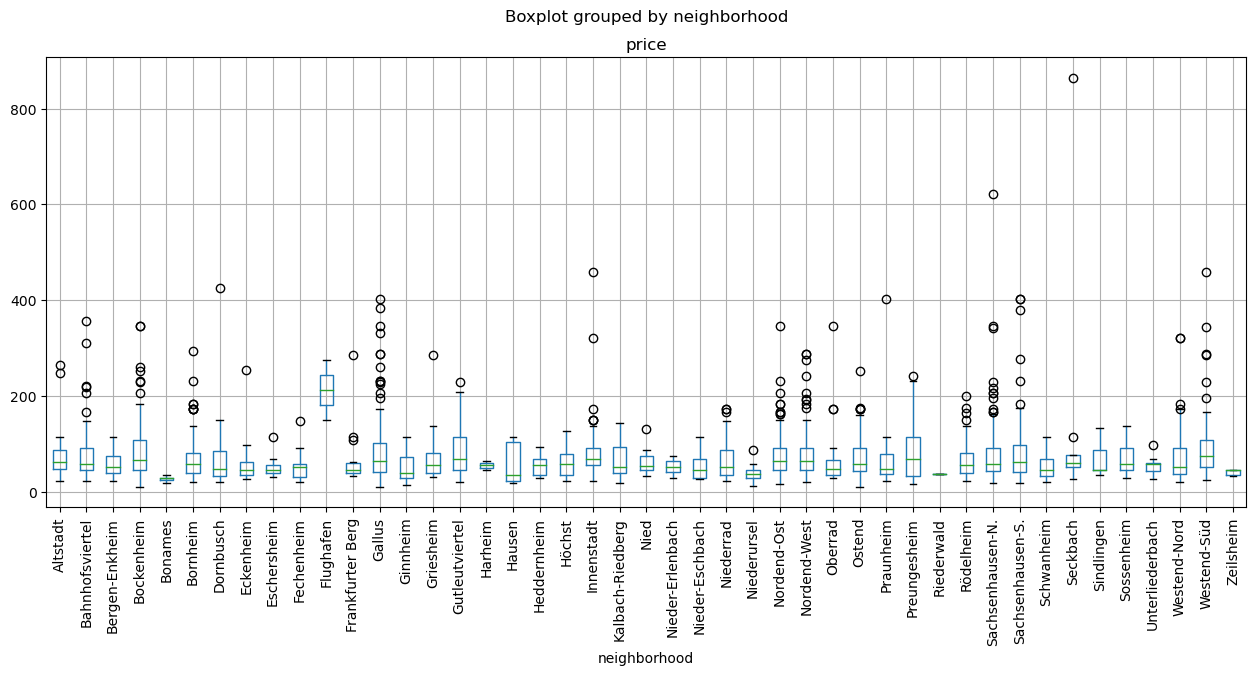

In [33]:
frankfurt.boxplot(column='price',by='neighborhood',figsize=(15,6),rot=90)

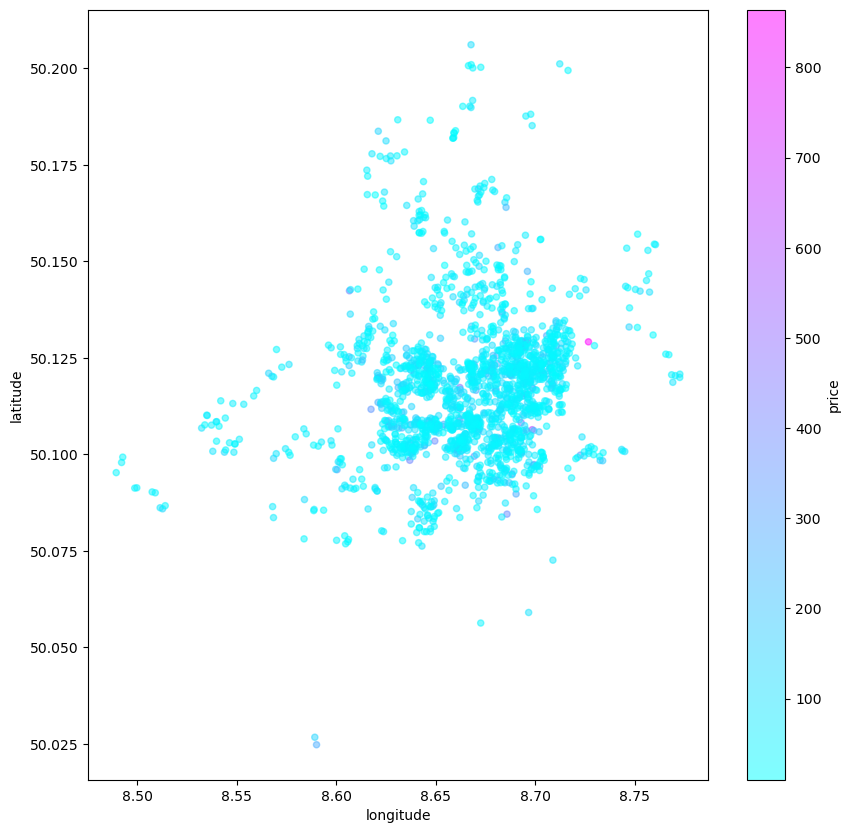

In [3]:
frankfurt.plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

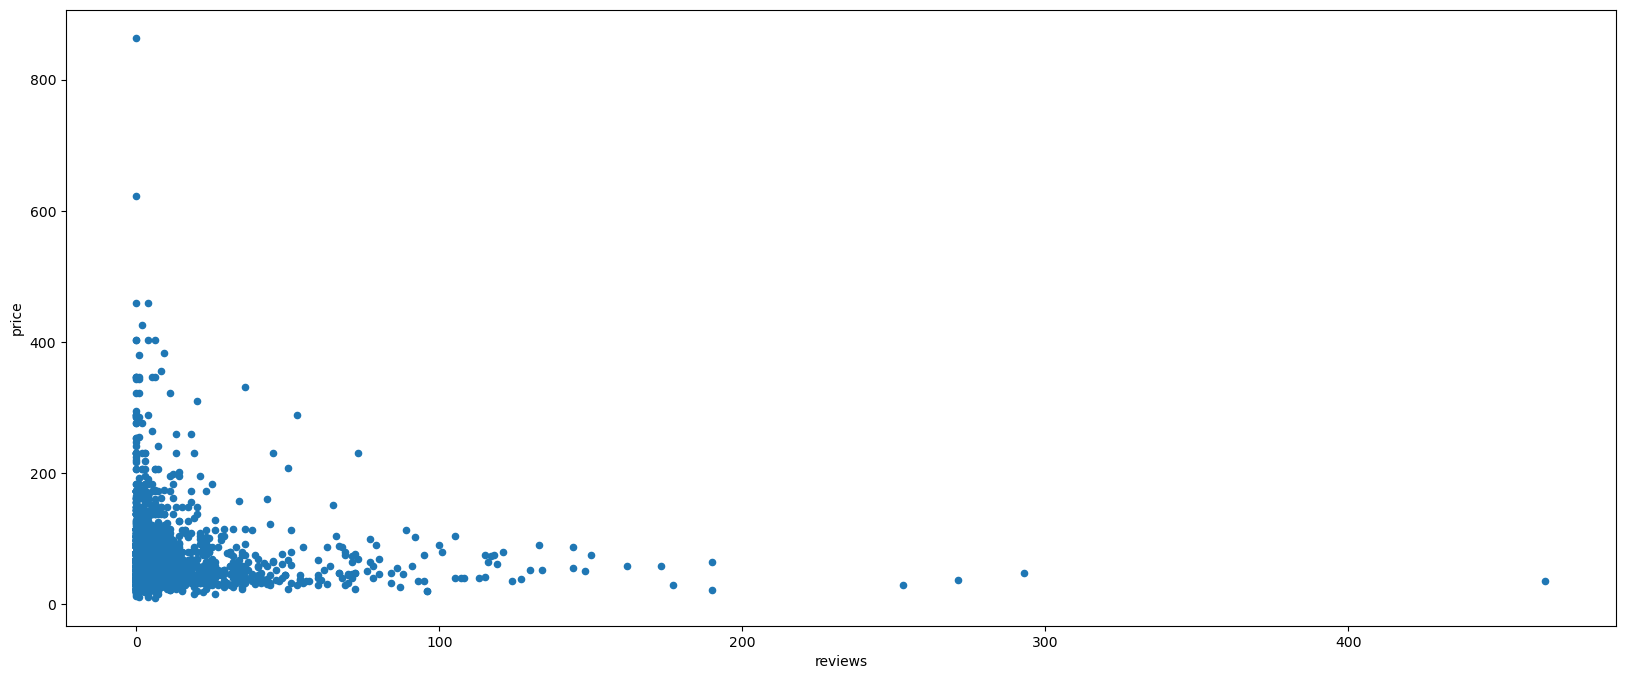

In [4]:
frankfurt.plot.scatter(x='reviews',y='price',figsize=(20,8));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

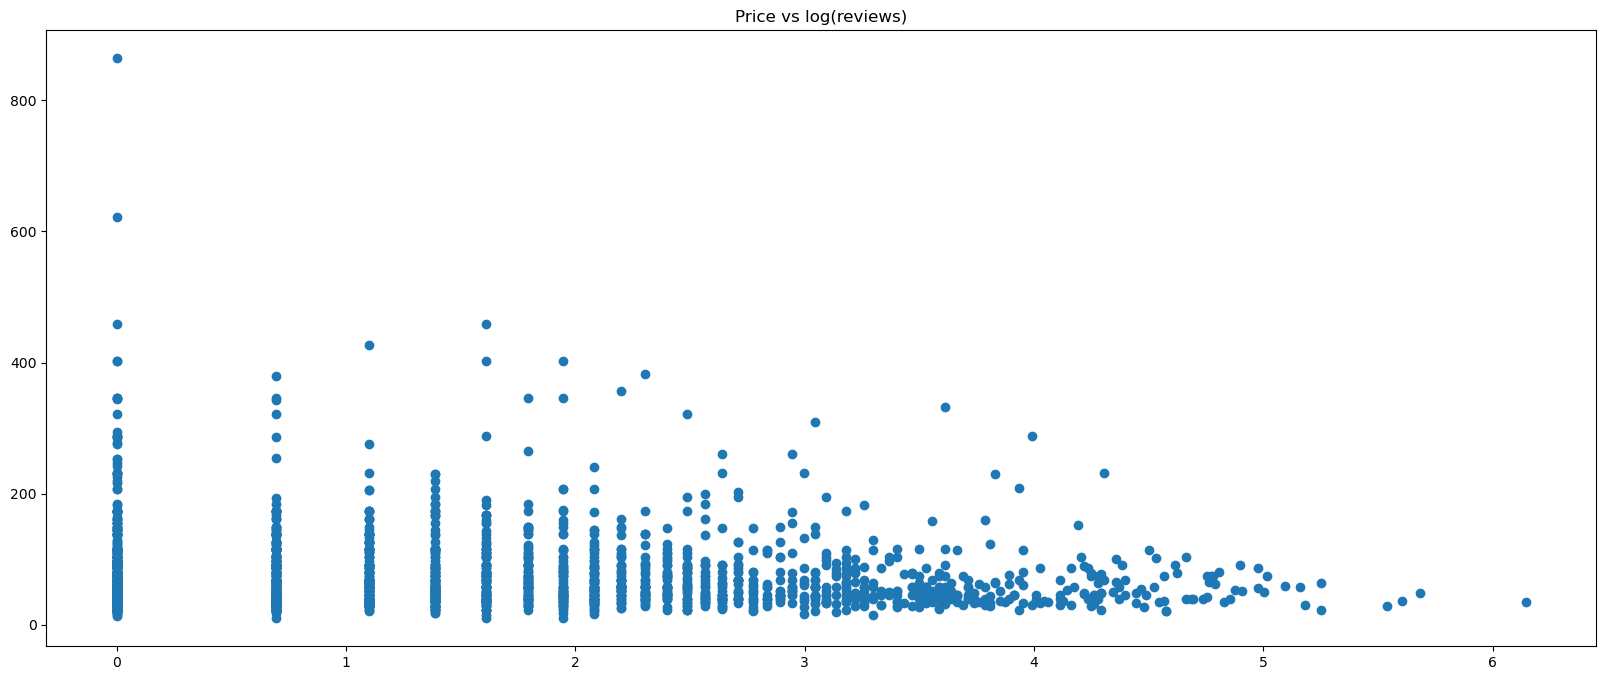

In [5]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+frankfurt['reviews']), frankfurt['price'])
plt.title('Price vs log(reviews)');

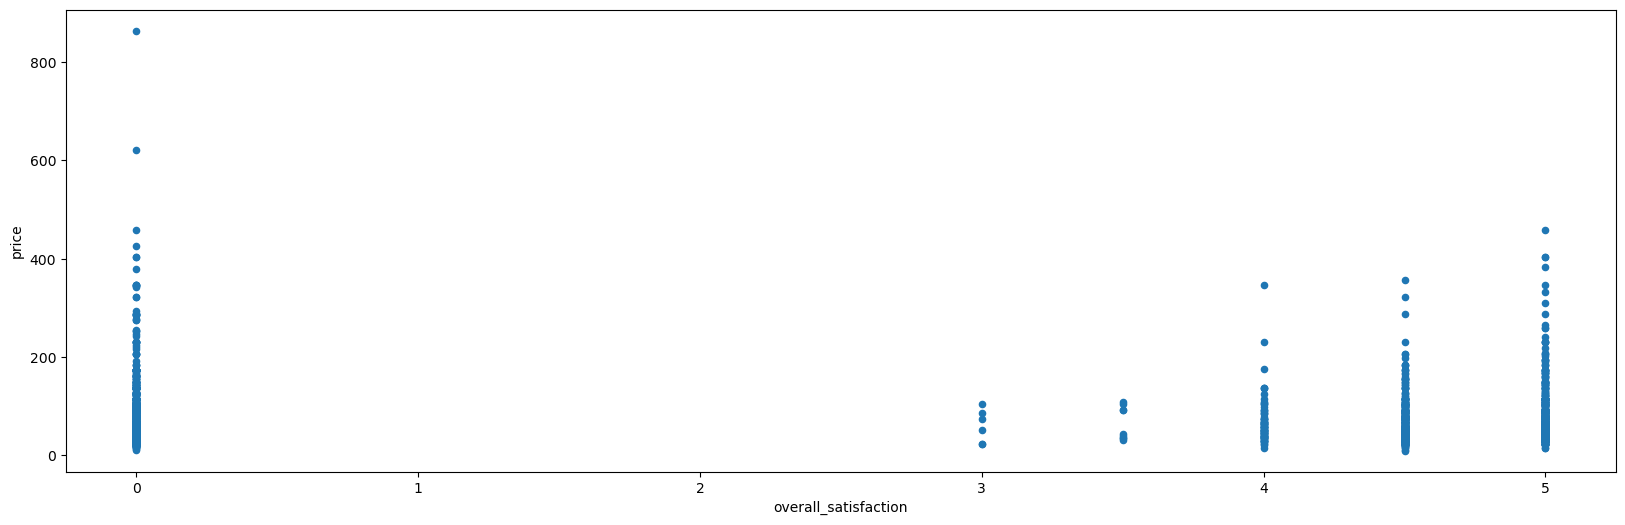

In [6]:
#Satisfaction
frankfurt.plot.scatter(x='overall_satisfaction', y='price', figsize=(20,6));

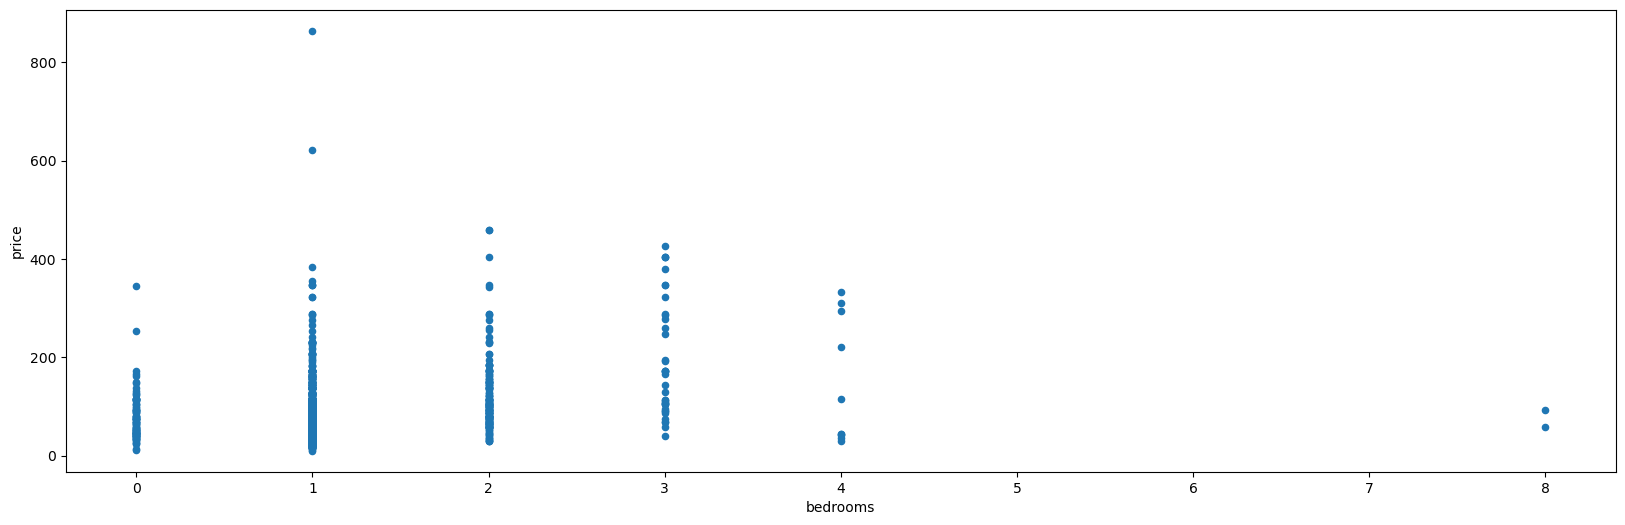

In [7]:
#Bedrooms
frankfurt.plot.scatter(x='bedrooms', y='price', figsize=(20,6));

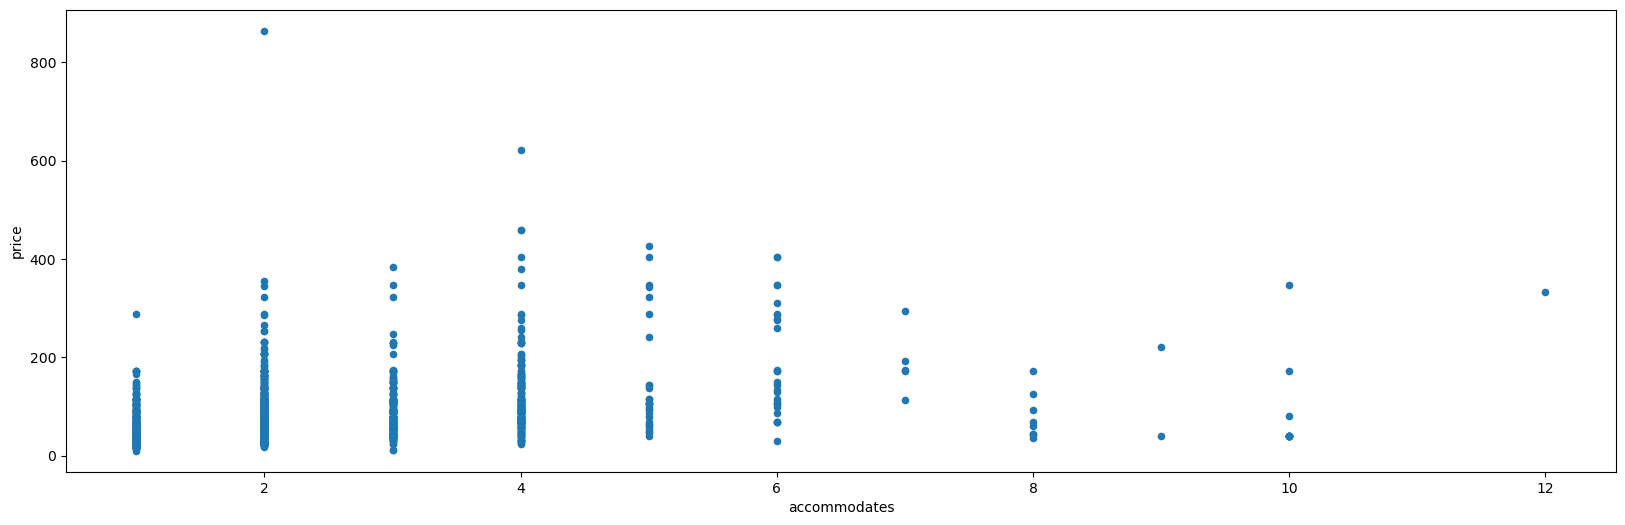

In [19]:
#Accomodates
# frankfurt.plot.scatter(x='accommodates',y='price',figsize(20,6));
# frankfurt.plot.scatter(x='accommodates', y='price',figsize=(20,6));
frankfurt.plot.scatter(x='accommodates', y='price',figsize=(20,6));

In [53]:
#Feature Engineering
frankfurt['logreviews'] = np.log(1 + frankfurt['reviews'])
frankfurt['bedrooms_per_accommodates'] = frankfurt['bedrooms'] / frankfurt['accommodates']

<IPython.core.display.Javascript object>

In [54]:
frankfurt.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates
0,Shared room,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395,3.951244,0.100000
1,Shared room,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187,3.332205,0.500000
2,Shared room,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030,0.000000,0.500000
3,Shared room,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627,0.000000,0.166667
4,Shared room,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514,0.000000,0.500000


In [55]:
#Shall we remove propertiess without reviews
#Let's do the data analysis with and also without the reviews
#During this project we found out that properties with very few number of reviews are very difficult to predict.We opted to fix the minimun
# number of reviews to 10
data = frankfurt.copy()
print('amount of data original: ' + str(len(data)))
data = data[data['reviews'] > 10] ### <<---  Change 10 for any other number to change the minimum number of reviews you require
print('amount of data after removing "few reviews" properties: ' + str(len(data)))

amount of data original: 1995
amount of data after removing "few reviews" properties: 493


In [56]:
data = pd.get_dummies(data)
data.head()

<IPython.core.display.Javascript object>

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,...,neighborhood_Sachsenhausen-N.,neighborhood_Sachsenhausen-S.,neighborhood_Schwanheim,neighborhood_Seckbach,neighborhood_Sindlingen,neighborhood_Sossenheim,neighborhood_Unterliederbach,neighborhood_Westend-Nord,neighborhood_Westend-Süd,neighborhood_Zeilsheim
0,51,4.5,10,1.0,80.0,50.108833,8.668395,3.951244,0.100000,0,...,0,0,0,0,0,0,0,0,0,0
1,27,4.5,2,1.0,52.0,50.120212,8.657187,3.332205,0.500000,0,...,0,0,0,0,0,0,0,0,1,0
6,21,4.5,2,1.0,109.0,50.116308,8.679903,3.091042,0.500000,0,...,0,0,0,0,0,0,0,0,0,0
10,31,4.5,3,1.0,79.0,50.114359,8.685874,3.465736,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
14,15,5.0,2,1.0,60.0,50.107130,8.626485,2.772589,0.500000,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#Split data into training and testing sets
X = data.copy().drop('price', axis = 1)
y = data['price'].copy()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# BASELINE 

In [74]:
#Baseline
baseline = y_train.median() #median train
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
print('And we will be right +- ' + str(baseline_error))

And we will be right +- 47.1899046065384


# Machine Learning

In [75]:
lr =LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [76]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 30.36087753875618, mrse_test: 5464395675946.043
Ridge mrse_train: 31.323040980217794, mrse_test: 34.791803147134544 best alpha: 100.0
Lasso mrse_train: 31.43232181185478, mrse_test: 34.16718989710831 best alpha: 1.0
ElasticNet mrse_train: 31.56566254997469, mrse_test: 34.411992289477524 best alpha: 1.0 best l1: 0.9


In [77]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lasso.coef_[i]))

room_type_Entire home/apt, 18.65396704892628
bedrooms, 9.901891866645677
neighborhood_Westend-Nord, 6.56074110527913
overall_satisfaction, 5.319197012800603
neighborhood_Gallus, 4.972585149672785
accommodates, 4.235241149707109
neighborhood_Gutleutviertel, 3.9328494977940274
neighborhood_Fechenheim, 1.0643855768850206
neighborhood_Westend-Süd, 1.013152942261285
neighborhood_Nied, 0.5527358488132448
neighborhood_Bockenheim, 0.5405469785877813
neighborhood_Sachsenhausen-N., 0.16467591306490373


# Error Analysis

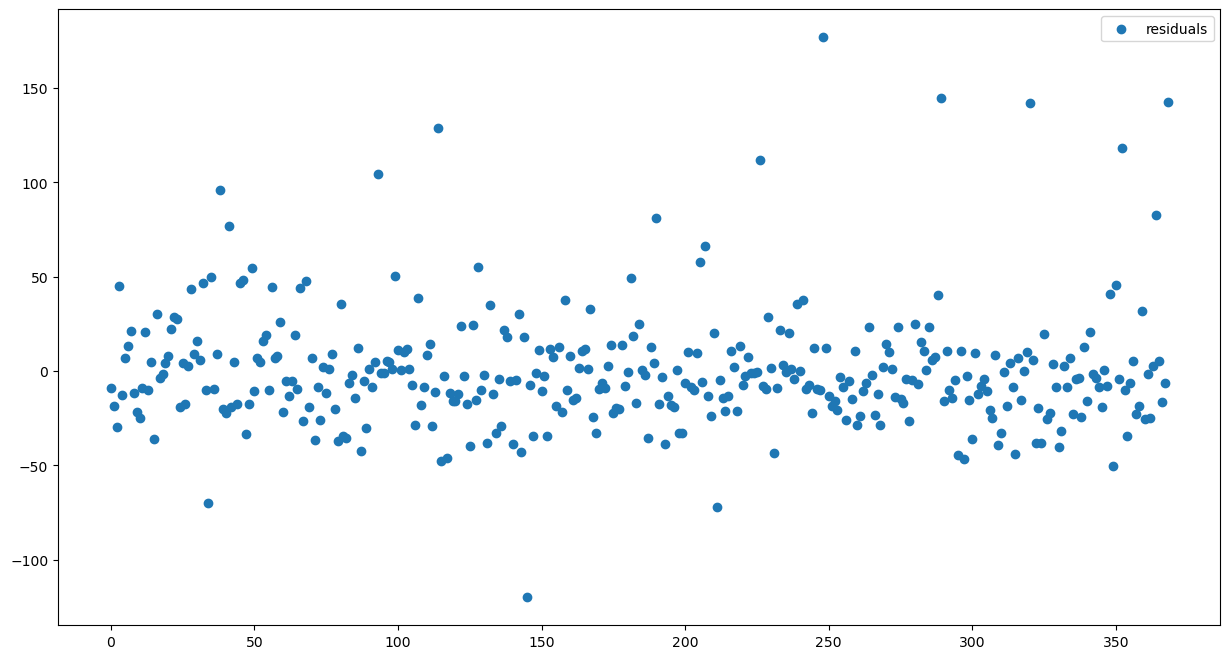

In [78]:
y_pred_train = lasso.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [79]:
X_train[np.abs(diff) > 100].describe()

,reviews,overall_satisfaction,accommodates,bedrooms,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,...,neighborhood_Sachsenhausen-N.,neighborhood_Sachsenhausen-S.,neighborhood_Schwanheim,neighborhood_Seckbach,neighborhood_Sindlingen,neighborhood_Sossenheim,neighborhood_Unterliederbach,neighborhood_Westend-Nord,neighborhood_Westend-Süd,neighborhood_Zeilsheim
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.0,9.000000,9.0,9.0,9.0,9.0,9.0,9.000000,9.0,9.0
mean,32.888889,4.666667,5.111111,2.222222,50.104607,8.655607,3.356490,0.446296,0.777778,0.222222,...,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0
std,20.714997,0.353553,3.218868,1.301708,0.011531,0.025057,0.617839,0.112971,0.440959,0.440959,...,0.0,0.440959,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0
min,11.000000,4.000000,2.000000,1.000000,50.089262,8.625551,2.484907,0.250000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25%,19.000000,4.500000,3.000000,1.000000,50.101233,8.634469,2.995732,0.333333,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
50%,23.000000,4.500000,4.000000,2.000000,50.102222,8.653955,3.178054,0.500000,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
75%,45.000000,5.000000,6.000000,3.000000,50.107755,8.669467,3.828641,0.500000,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
max,73.000000,5.000000,12.000000,4.000000,50.129872,8.699099,4.304065,0.600000,1.000000,1.000000,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


In [80]:
high_error = X_train[np.abs(diff) > 80]
print('size high error: ' + str(len(high_error)))
low_error = X_train[np.abs(diff) < 10]
print('size low error: ' + str(len(low_error)))

size high error: 12
size low error: 142


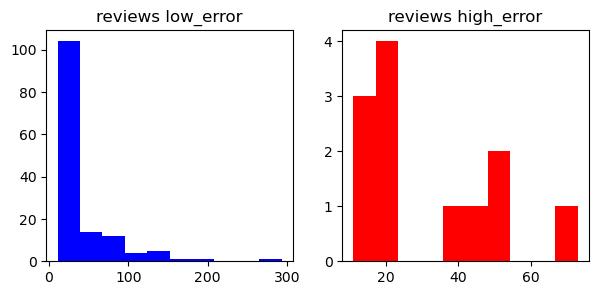

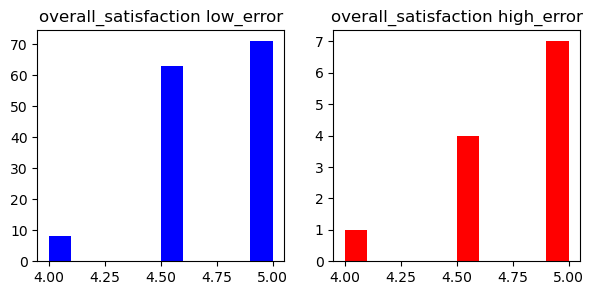

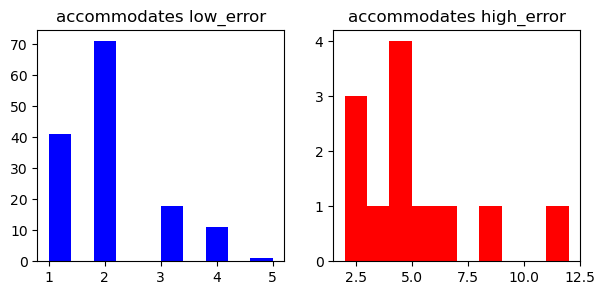

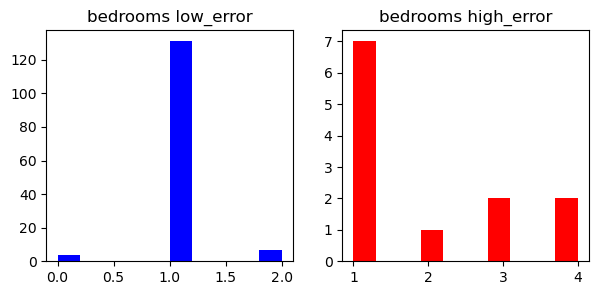

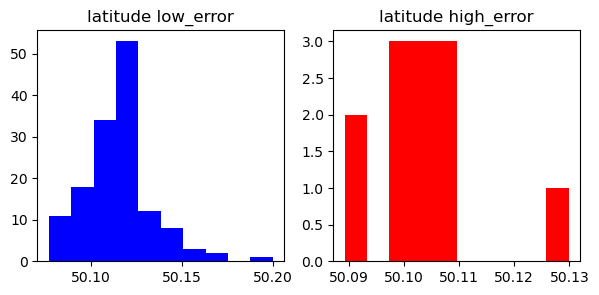

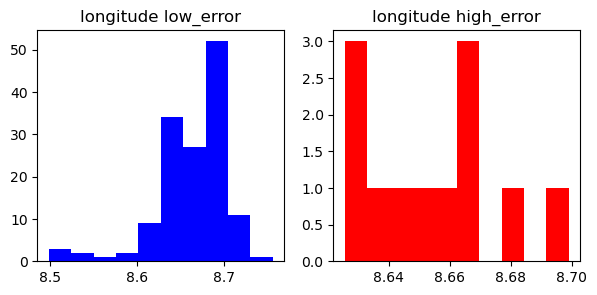

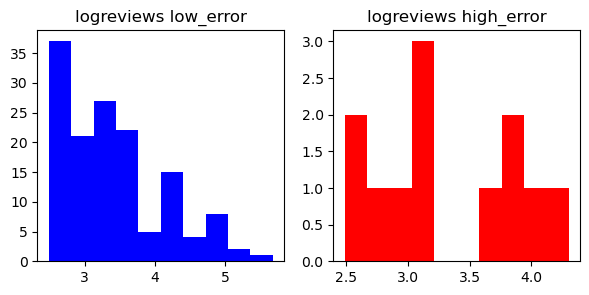

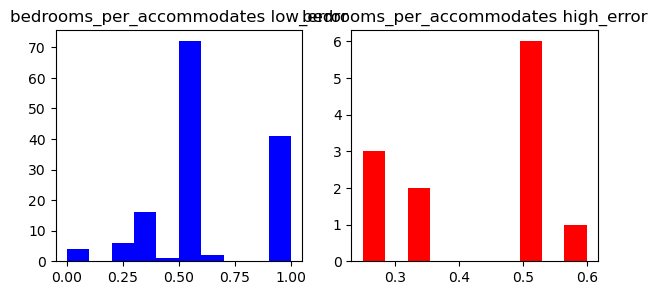

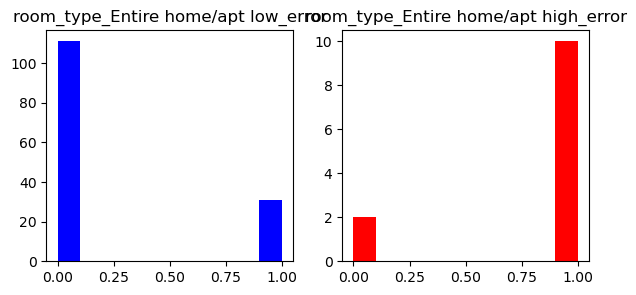

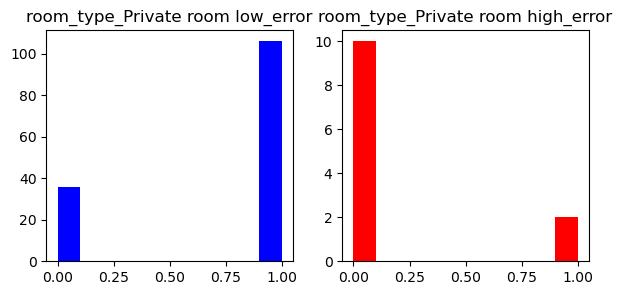

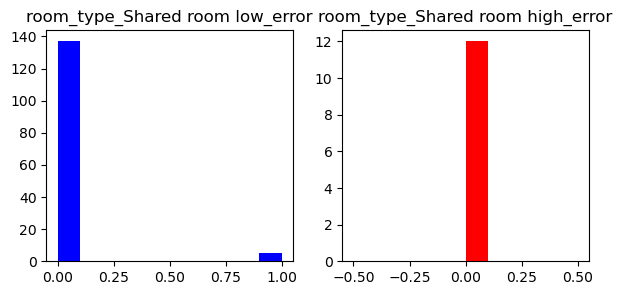

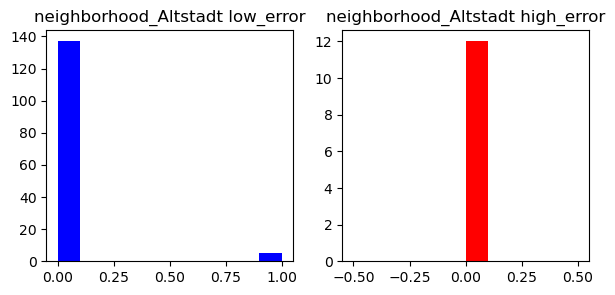

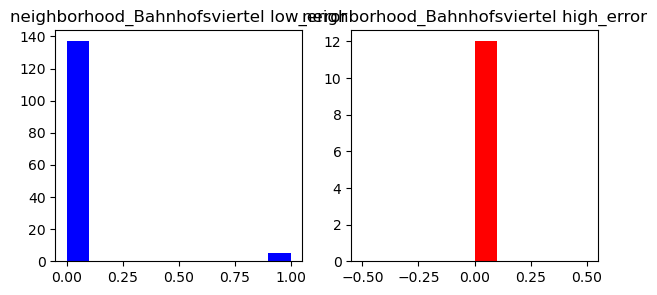

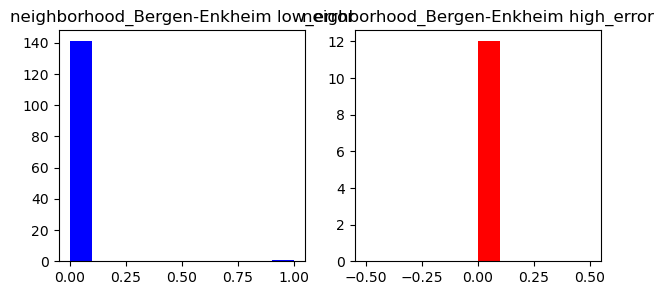

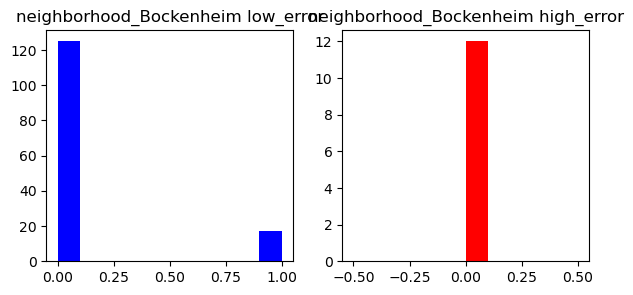

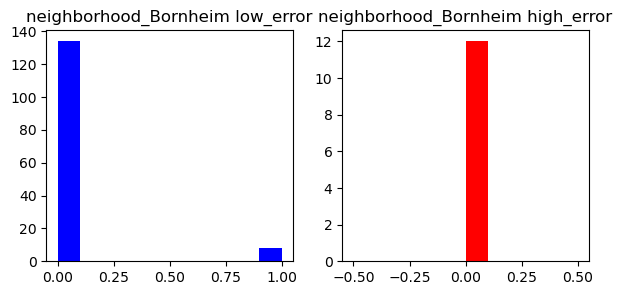

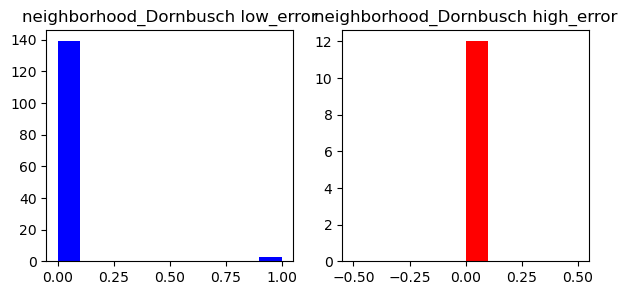

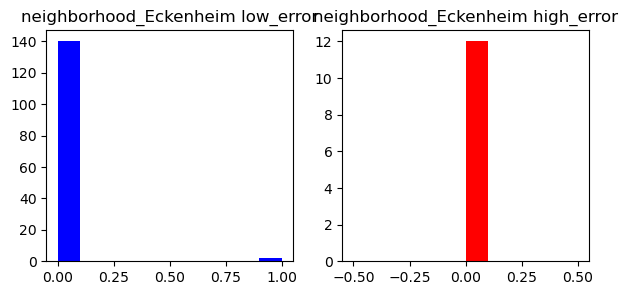

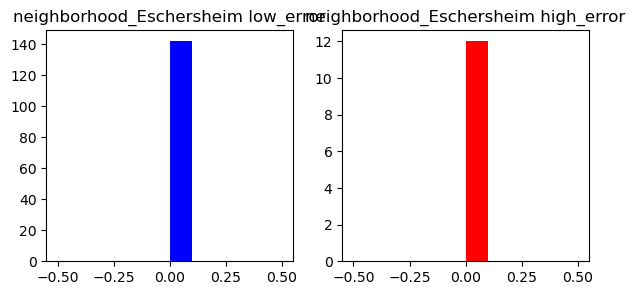

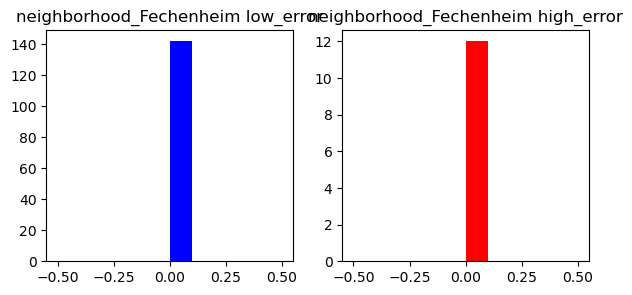

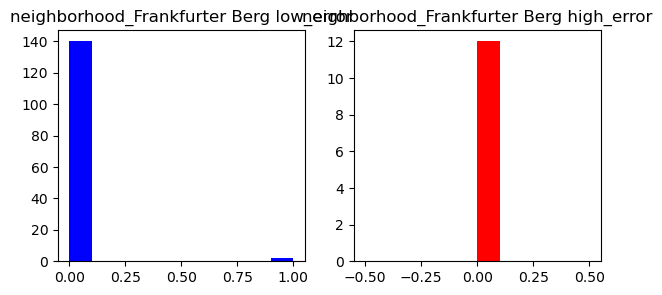

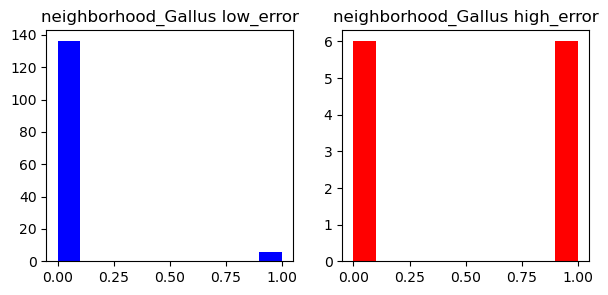

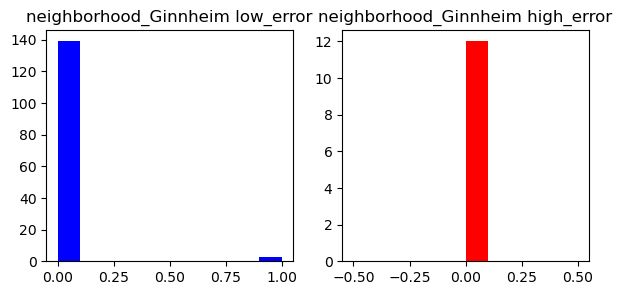

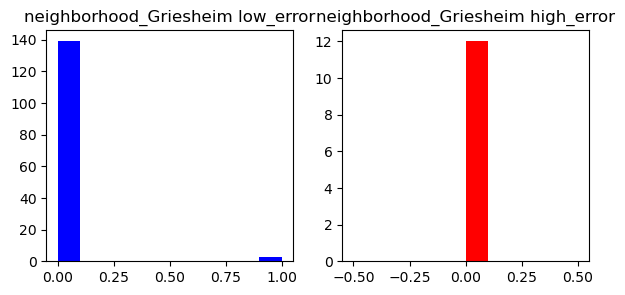

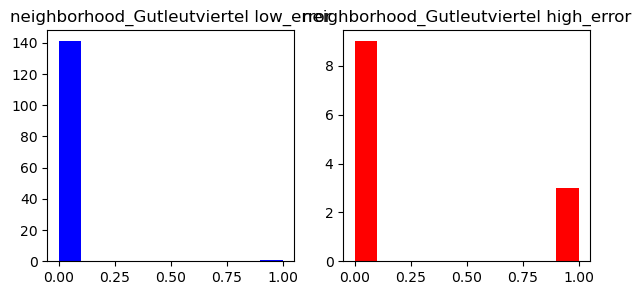

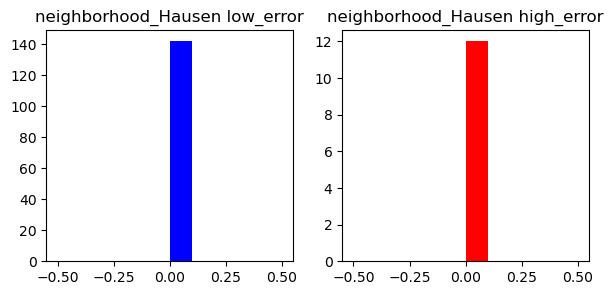

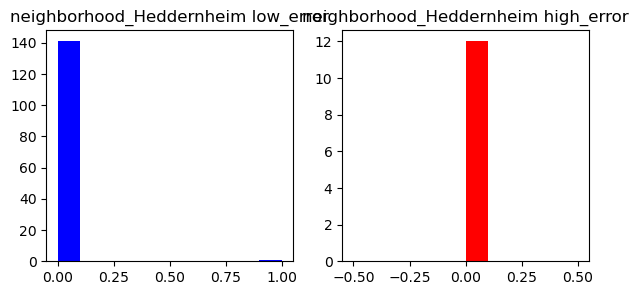

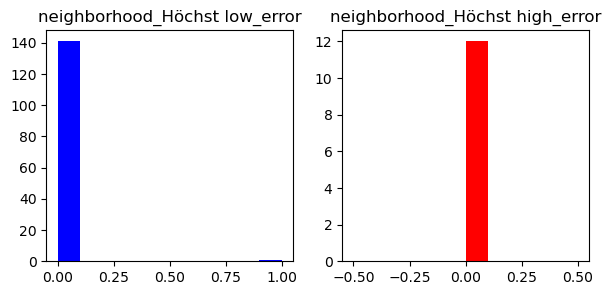

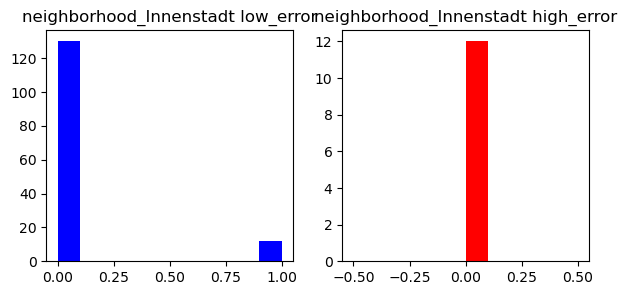

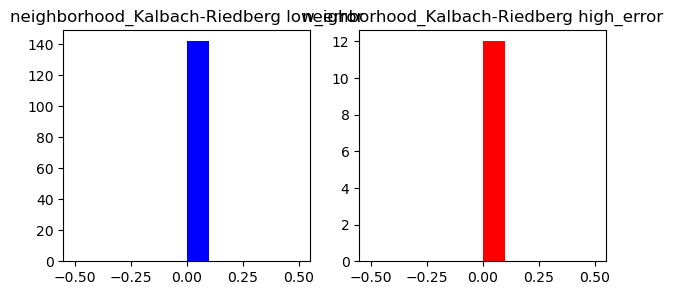

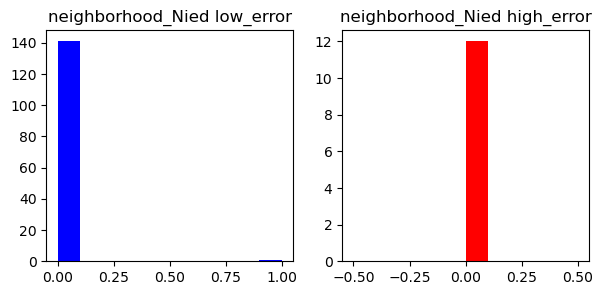

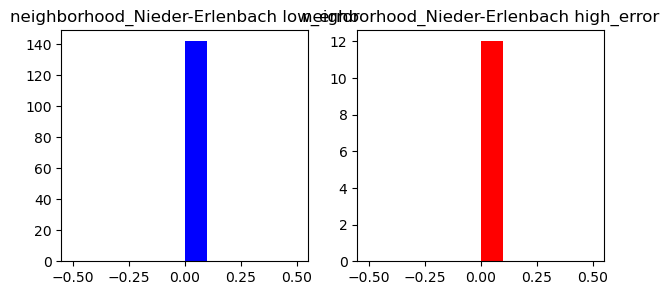

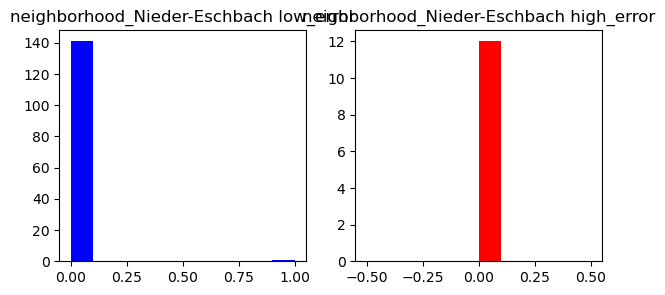

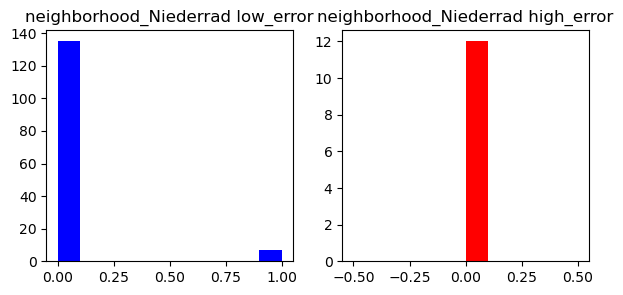

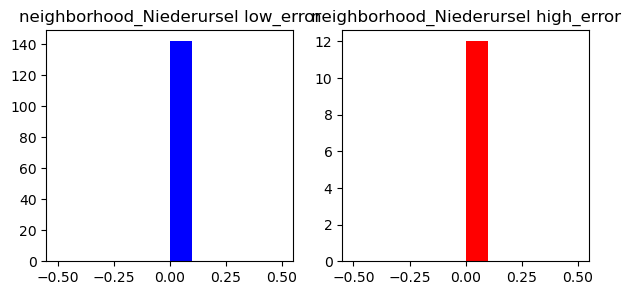

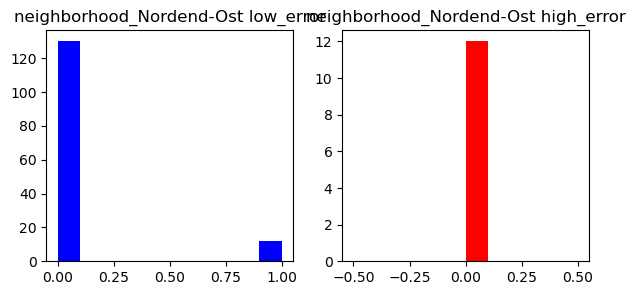

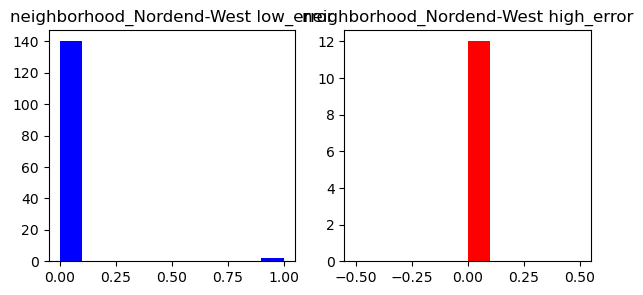

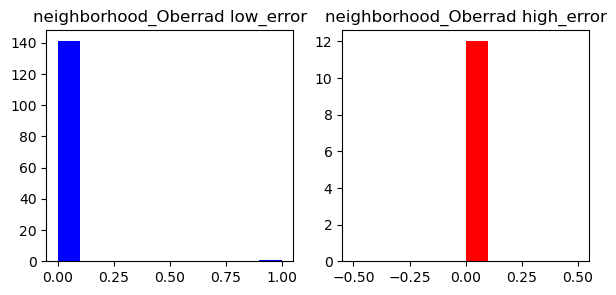

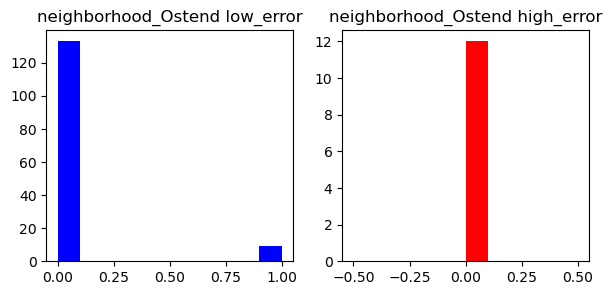

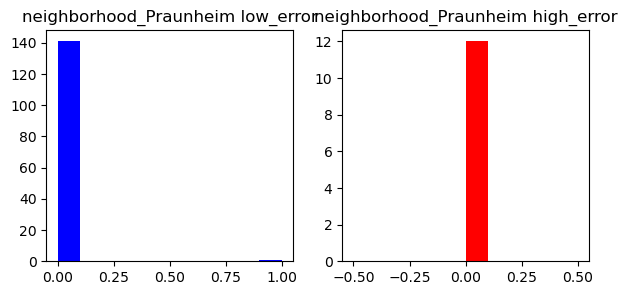

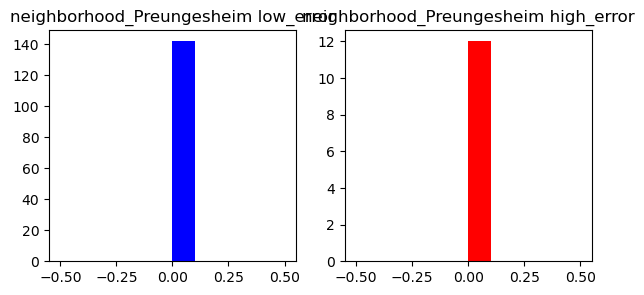

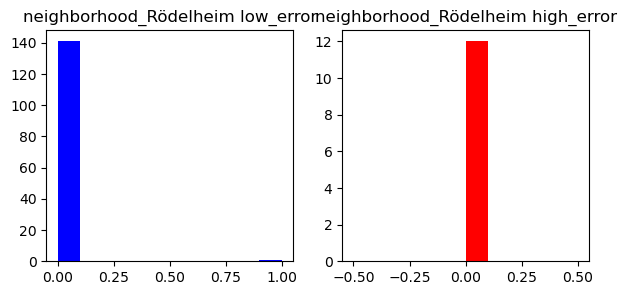

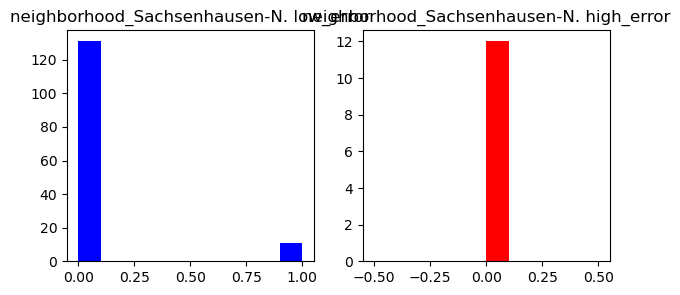

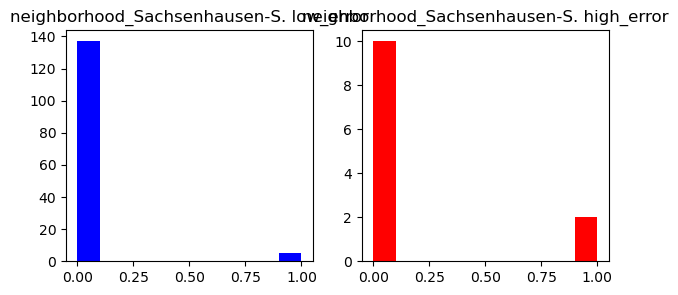

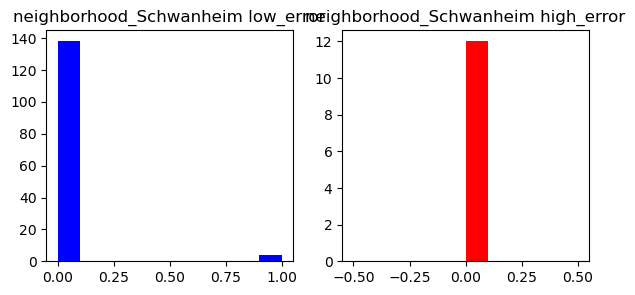

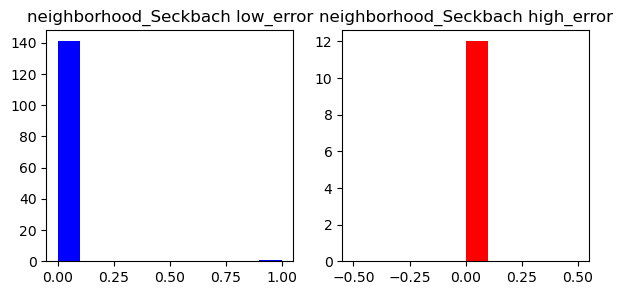

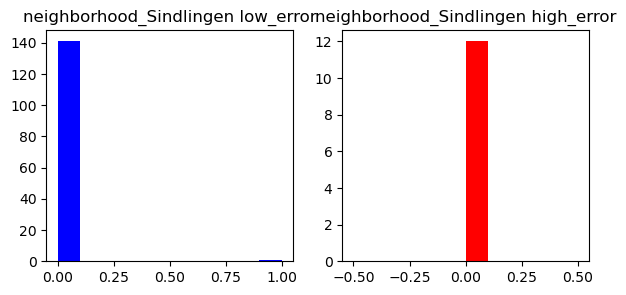

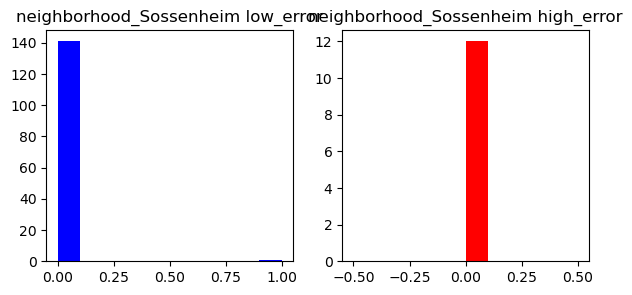

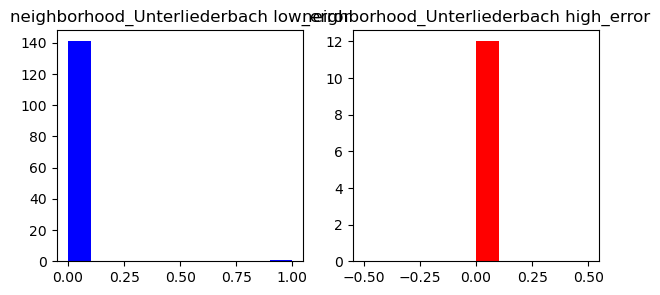

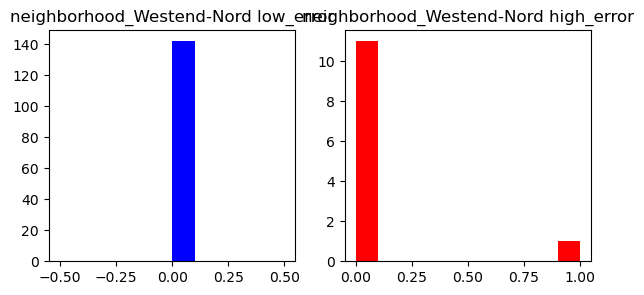

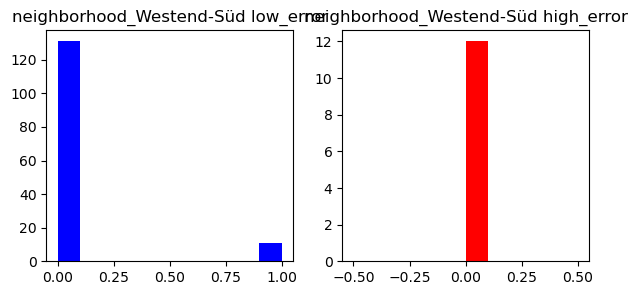

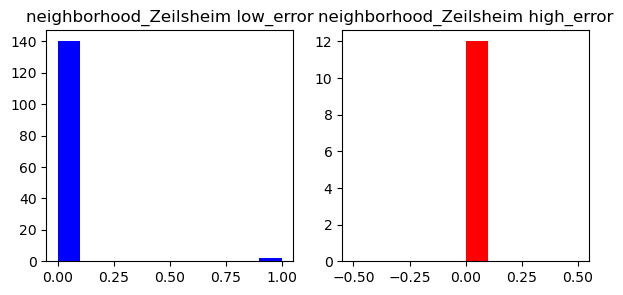

In [81]:
for c in high_error.columns:
    plt.figure(figsize=(7,3))
    plt.subplot(121)
    plt.hist(low_error[c], color='b')
    plt.title(c + ' low_error')
    plt.subplot(122)
    plt.hist(high_error[c], color='r')
    plt.title(c + ' high_error')
    plt.show()